In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
train_bodies = pd.read_csv('/content/drive/MyDrive/fnc_1_dataset/train_bodies.csv')
train_stances = pd.read_csv('/content/drive/MyDrive/fnc_1_dataset/train_stances.csv')
test_bodies = pd.read_csv('/content/drive/MyDrive/fnc_1_dataset/test_bodies.csv')
test_stances = pd.read_csv('/content/drive/MyDrive/fnc_1_dataset/competition_test_stances.csv')
print(train_bodies.shape)
print(train_stances.shape)
print(test_bodies.shape)
print(test_stances.shape)

(1683, 2)
(49972, 3)
(904, 2)
(25413, 3)


In [3]:
def search(data, key, search_label, return_labels, l, r):
  if l > r:
    return None
  mid = int((l+r)/2)
  value = data[search_label][mid]
  if value < key:
    return search(data, key, search_label, return_labels, mid+1, r)
  elif value == key:
    search_result = []
    for b in return_labels:
      search_result.append(data[b][mid])
    return search_result
  else:
    return search(data, key, search_label, return_labels, l, mid-1)

**LABELS**

3 - Agree: There is a relation between headline and article
body.

1 - Disagree: There is no relation between headline and
article body.

2 - Discuss: There is a little bit of match between headline
and article body, taking it as neutral.

0 - Unrelated: The topic discussed in headline and body are
completely different.


---



In [4]:
def num_label(label):
  if label == 'unrelated':
    return [1,0,0,0]
  elif label == 'disagree':
    return [0,1,0,0]
  elif label == 'discuss':
    return [0,0,1,0]
  else:
    return [0,0,0,1]

In [5]:
import numpy as np
def combine_data(data1,data2, query_label, return_labels1, return_labels2, return_label, isLabeled=True):
  result = []
  label = []
  size = data1.shape[0]
  size = int(size/2)
  for a in range(0,size):
    # print(a)
    key = data1[query_label][a]
    result1 = search(data2, key, query_label, return_labels2, 0, data2.shape[0]-1)
    result2 = []
    for b in return_labels1:
      result2.append(data1[b][a])
    if(isLabeled):
      label.append(num_label(data1[return_label][a]))
    result1 = np.array(result1)
    result2 = np.array(result2)
    result3 = np.concatenate((result1,result2),axis=0)
    result.append(result3)
  result = np.array(result)
  label = np.array(label)
  return result, label


In [6]:
train_data, train_label = combine_data(train_stances, train_bodies, 'Body ID',['Headline'],['articleBody'],'Stance',True)
test_data, test_label = combine_data(test_stances, test_bodies, 'Body ID',['Headline'],['articleBody'],'Stance',True)

In [7]:
print(train_data)
print(train_label)  
print(test_data)
print(test_label)

[['Danny Boyle is directing the untitled film\n\nSeth Rogen is being eyed to play Apple co-founder Steve Wozniak in Sony’s Steve Jobs biopic.\n\nDanny Boyle is directing the untitled film, based on Walter Isaacson\'s book and adapted by Aaron Sorkin, which is one of the most anticipated biopics in recent years.\n\nNegotiations have not yet begun, and it’s not even clear if Rogen has an official offer, but the producers — Scott Rudin, Guymon Casady and Mark Gordon — have set their sights on the talent and are in talks.\n\nOf course, this may all be for naught as Christian Bale, the actor who is to play Jobs, is still in the midst of closing his deal. Sources say that dealmaking process is in a sensitive stage.\n\nInsiders say Boyle will is flying to Los Angeles to meet with actress to play one of the female leads, an assistant to Jobs. Insiders say that Jessica Chastain is one of the actresses on the meeting list.\n\nWozniak, known as "Woz," co-founded Apple with Jobs and Ronald Wayne. 

```
tf.keras.preprocessing.text.text_to_word_sequence(
    input_text,
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    lower=True,
    split=' '
)

tf.keras.preprocessing.text.Tokenizer(
    num_words=None,
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    lower=True,
    split=' ',
    char_level=False,
    oov_token=None,
    document_count=0,
    **kwargs
)

num_words - the maximum number of words to keep, based on word frequency. Only the most common num_words-1 words will be kept.
filters - a string where each element is a character that will be filtered from the texts. The default is all punctuation, plus tabs and line breaks, minus the ' character.
lower - boolean. Whether to convert the texts to lowercase.
split - str. Separator for word splitting.
char_level - if True, every character will be treated as a token.
oov_token - if given, it will be added to word_index and used to replace out-of-vocabulary words during text_to_sequence calls 

fit_on_texts(
    texts
)

Updates internal vocabulary based on a list of texts.

In the case where texts contains lists, we assume each entry of the lists to be a token.

Required before using texts_to_sequences or texts_to_matrix.

texts_to_matrix

View source

texts_to_matrix(
    texts, mode='binary'
)

Convert a list of texts to a Numpy matrix.
sequences - list of sequences (a sequence is a list of integer word indices).
mode - one of "binary", "count", "tfidf", "freq" 
```



In [8]:
def combine_headline_body(data):
  size = data.shape[0]
  data_list = []
  for a in range(0,size):
    text = data[a][0] + " " + data[a][1]
    data_list.append(text)
  return np.array(data_list)



In [9]:
print(train_data.shape)
print(test_data.shape)
train_data = combine_headline_body(train_data)
test_data = combine_headline_body(test_data)

(24986, 2)
(12706, 2)


In [10]:
print(train_data)
print(test_data)

['Danny Boyle is directing the untitled film\n\nSeth Rogen is being eyed to play Apple co-founder Steve Wozniak in Sony’s Steve Jobs biopic.\n\nDanny Boyle is directing the untitled film, based on Walter Isaacson\'s book and adapted by Aaron Sorkin, which is one of the most anticipated biopics in recent years.\n\nNegotiations have not yet begun, and it’s not even clear if Rogen has an official offer, but the producers — Scott Rudin, Guymon Casady and Mark Gordon — have set their sights on the talent and are in talks.\n\nOf course, this may all be for naught as Christian Bale, the actor who is to play Jobs, is still in the midst of closing his deal. Sources say that dealmaking process is in a sensitive stage.\n\nInsiders say Boyle will is flying to Los Angeles to meet with actress to play one of the female leads, an assistant to Jobs. Insiders say that Jessica Chastain is one of the actresses on the meeting list.\n\nWozniak, known as "Woz," co-founded Apple with Jobs and Ronald Wayne. H

<b>PREPROCESSING</b>

In [11]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize
import nltk 
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
# Use English stemmer.
word_stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [12]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [13]:
def get_cleaned_data(input_data, mode='df'):
    stop = stopwords.words('english')
    
    input_df = ''
    
    if mode != 'df':
        input_df = pd.DataFrame(input_data, columns=['text'])
    else:
        input_df = input_data
        
    #lowercase the text
    input_df['text'] = input_df['text'].str.lower()
    
    input_df['text'] = input_df['text'].apply(lambda elem: decontracted(elem))
    
    #remove special characters
    input_df['text'] = input_df['text'].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
    
    # remove numbers
    input_df['text'] = input_df['text'].apply(lambda elem: re.sub(r"\d+", "", elem))
    
    #remove stopwords
    input_df['text'] = input_df['text'].apply(lambda x: ' '.join([word.strip() for word in x.split() if word not in (stop)]))
    
    #stemming, changes the word to root form
#     input_df['text'] = input_df['text'].apply(lambda words: [word_stemmer.stem(word) for word in words])
    
    #lemmatization, same as stemmer, but language corpus is used to fetch the root form, so resulting words make sense
#     more description @ https://www.datacamp.com/community/tutorials/stemming-lemmatization-python
    input_df['text'] = input_df['text'].apply(lambda words: (wordnet_lemmatizer.lemmatize(words)))
#     print(input_df.head(3))
    
    return input_df

In [14]:
train_data = get_cleaned_data(train_data, mode='np')

In [15]:
train_data.head()
train_data = train_data['text'].values.tolist()
print(train_data[0])

danny boyle directing untitled filmseth rogen eyed play apple cofounder steve wozniak sonys steve jobs biopicdanny boyle directing untitled film based walter isaacson book adapted aaron sorkin one anticipated biopics recent yearsnegotiations yet begun even clear rogen official offer producers scott rudin guymon casady mark gordon set sights talent talksof course may naught christian bale actor play jobs still midst closing deal sources say dealmaking process sensitive stageinsiders say boyle flying los angeles meet actress play one female leads assistant jobs insiders say jessica chastain one actresses meeting listwozniak known woz cofounded apple jobs ronald wayne first met jobs worked atari later responsible creating early apple computers police find mass graves least bodies near mexico town students disappeared police clash


STEMMING

In [18]:
import nltk
nltk.download('punkt')
from nltk.stem.porter import PorterStemmer   #to be used for our task
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import SnowballStemmer 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [25]:
def token_stem_data(data):
  ret_data = []
  count = 0
  for a in data:
    print(count)
    a = a.lower()
    tokens = nltk.word_tokenize(a)
    stemmed = []
    for f in tokens:
      stemmed.append(PorterStemmer().stem(f))
    ret_data.append(stemmed)
    count = count + 1
  return ret_data


In [ ]:
train_data = token_stem_data(train_data)

In [18]:
from keras.preprocessing.text import text_to_word_sequence
def to_word_seq(data):
  list_data = []
  for a in data:
    list1 = text_to_word_sequence(a, lower=True)
    list_data.append(list1)
  return list_data


In [18]:
train_data = to_word_seq(train_data)
test_data = to_word_seq(test_data)

In [11]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words=10000,lower=True,split=' ')
combine_data = np.concatenate((train_data,test_data),axis=0)
tokenizer.fit_on_texts(combine_data)
train_data = tokenizer.texts_to_sequences(train_data)
test_data = tokenizer.texts_to_sequences(test_data)
train_data = pad_sequences(train_data, maxlen=500)
test_data = pad_sequences(test_data, maxlen=500)
word_index = tokenizer.word_index


In [17]:
print(train_data[0])
print(test_data[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

CHI-SQUARE FEATURE EXTRACTION

In [18]:
# Load libraries
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
  
  
# Two features with highest chi-squared statistics are selected
chi2_features = SelectKBest(chi2, k = 200)
train_data = chi2_features.fit_transform(train_data, train_label)
test_data = chi2_features.fit_transform(test_data, test_label)
  
# Reduced features
print('Reduced feature number:', train_data.shape[1])

Reduced feature number: 200


PCA FEATURE EXTRACTION

In [27]:
from sklearn import decomposition, datasets
from sklearn.preprocessing import StandardScaler
#scaling
std_slc = StandardScaler()
train_std = std_slc.fit_transform(train_data)
test_std = std_slc.fit_transform(test_data)

print(train_std.shape, test_std.shape)
#PCA
pca = decomposition.PCA(n_components=200)

train_std_pca = pca.fit_transform(train_data)
test_std_pca = pca.fit_transform(test_data)

print(train_std_pca.shape, test_std_pca.shape)


(24986, 500) (12706, 500)
(24986, 200) (12706, 200)


<b>Installing modules</b>

We start by installing the ‘gensim’ and ‘nltk’ modules.
```
pip install gensim
pip install nltk
```
<b>Importing libraries</b>
```
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim
from gensim.models import Word2Vec
```
<b>Building the Word2Vec model using Gensim</b><br>
To create the word embeddings using CBOW architecture or Skip Gram architecture, you can use the following respective lines of code:
```
model1 = gensim.models.Word2Vec(data, min_count = 1,size = 100, window = 5, sg=0) 
model2 = gensim.models.Word2Vec(data, min_count = 1, size = 100, window = 5, sg = 1)
```

In [ ]:
!pip install gensim
!pip install nltk

In [19]:
import gensim
from gensim.models import Word2Vec
from gensim.test.utils import common_texts

In [20]:
model = Word2Vec(sentences=train_data, size=100, window=5, min_count=1, workers=4)

In [12]:
from gensim.models.keyedvectors import KeyedVectors
def get_embeddings(path):
  # model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300', binary=True, limit=500000)
  wv_from_bin = KeyedVectors.load_word2vec_format(path, binary=True, limit=500000) 
  #extracting word vectors from google news vector
  embeddings_index = {}
  for word, vector in zip(wv_from_bin.vocab, wv_from_bin.vectors):
      coefs = np.asarray(vector, dtype='float32')
      embeddings_index[word] = coefs[0:100]
  
  return embeddings_index

In [13]:
embeddings_index = {}
embeddings_index = get_embeddings('/content/drive/MyDrive/fnc_1_dataset/GoogleNews-vectors-negative300.bin')
print('Found %s word vectors.' % len(embeddings_index))

Found 500000 word vectors.


In [14]:
vocab_size = len(tokenizer.word_index) + 1

embedding_matrix = np.zeros((vocab_size, 100))
for word, i in word_index.items():
    try:
        embedding_vector = embeddings_index[word]
        embedding_matrix[i] = embedding_vector
    except KeyError:
        embedding_matrix[i]=np.random.normal(0,np.sqrt(0.25),100)

In [47]:
sentences = [["cat", "say", "meow"], ["dog", "say", "woof"]]
print(type(sentences))
model = Word2Vec(sentences, min_count=1)

<class 'list'>


In [21]:
sum = 0
max = 0
for a in train_data:
  count = 0
  for b in a:
    count = count + 1
  sum = sum + count
  if count > max:
    max = count
print(max)
print(sum/len(train_data))

2655
212.4508124549748


In [22]:
def construct_embedding(data):
  ret_data = []
  for a in data:
    size = len(a)
    data1 = []
    if(size < 300):
      for b in range(0,size):
        vec = model.wv[a[b]]
        data1.append(vec)
      for c in range(size,500):
        vec = []
        for d in range(0,100):
          vec.append(0)
        data1.append(vec)
      ret_data.append(data1)
    else:
      for c in range(0,300):
        vec = []
        for d in range(0,100):
          vec.append(0)
        data1.append(vec)
      ret_data.append(data1)
  return ret_data
  

In [23]:
train_data = construct_embedding(train_data)

In [ ]:
print(train_data[0])

In [20]:
sims = model.wv.most_similar('cat', topn=10)  # get other similar words
print(sims)

[('mundesley', 0.7636129856109619), ('adjacent', 0.5414031744003296), ('fireplace', 0.5349620580673218), ('minot', 0.5213156342506409), ('5mm', 0.5195441246032715), ('ewash', 0.5124074220657349), ('seventies', 0.4971475601196289), ('emanuela', 0.4936350882053375), ('degu', 0.4919605851173401), ('chipotle', 0.49072736501693726)]


In [ ]:
model1 = gensim.models.Word2Vec(train_data, min_count = 1,size = 100, window = 5, sg=0) 


In [ ]:
!pip install bert-embedding
# If you want to run on GPU machine, please install `mxnet-cu92`.
!pip install mxnet-cu92

In [ ]:
from bert_embedding import BertEmbedding

bert_abstract = """We introduce a new language representation model called BERT, which stands for Bidirectional Encoder Representations from Transformers.
 Unlike recent language representation models, BERT is designed to pre-train deep bidirectional representations by jointly conditioning on both left and right context in all layers.
 As a result, the pre-trained BERT representations can be fine-tuned with just one additional output layer to create state-of-the-art models for a wide range of tasks, such as question answering and language inference, without substantial task-specific architecture modifications. 
BERT is conceptually simple and empirically powerful. 
It obtains new state-of-the-art results on eleven natural language processing tasks, including pushing the GLUE benchmark to 80.4% (7.6% absolute improvement), MultiNLI accuracy to 86.7 (5.6% absolute improvement) and the SQuAD v1.1 question answering Test F1 to 93.2 (1.5% absolute improvement), outperforming human performance by 2.0%."""
sentences = bert_abstract.split('\n')
bert_embedding = BertEmbedding()
result = bert_embedding(sentences)
print(result.shape)

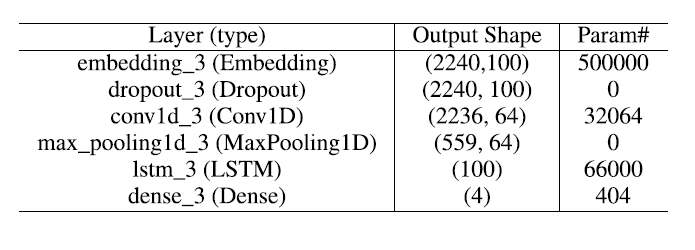

In [16]:
import tensorflow as tf
from keras.layers import LSTM, Conv1D, Embedding, GlobalMaxPooling1D, Dropout, Dense, MaxPooling1D
from keras.models import Sequential

In [17]:

model = Sequential()
#model.add(Embedding(input_dim=(200),output_dim=(200,100)))
model.add(Embedding(vocab_size, output_dim=100, weights=[embedding_matrix], input_length=500, trainable=False))
model.add(Conv1D(filters=64, input_shape=(300,100),kernel_size=5, activation='relu'))
print(model.output)
model.add(MaxPooling1D())
print(model.output)
model.add(Dropout(0.2))
print(model.output)
model.add(LSTM(units=100, return_sequences = False))
print(model.output)
model.add(Dense(units = 50 , activation = 'relu'))
print(model.output)
model.add(Dense(4, activation='softmax'))
print(model.output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

KerasTensor(type_spec=TensorSpec(shape=(None, 496, 64), dtype=tf.float32, name=None), name='conv1d/Relu:0', description="created by layer 'conv1d'")
KerasTensor(type_spec=TensorSpec(shape=(None, 248, 64), dtype=tf.float32, name=None), name='max_pooling1d/Squeeze:0', description="created by layer 'max_pooling1d'")
KerasTensor(type_spec=TensorSpec(shape=(None, 248, 64), dtype=tf.float32, name=None), name='dropout/Identity:0', description="created by layer 'dropout'")
KerasTensor(type_spec=TensorSpec(shape=(None, 100), dtype=tf.float32, name=None), name='lstm/PartitionedCall:0', description="created by layer 'lstm'")
KerasTensor(type_spec=TensorSpec(shape=(None, 50), dtype=tf.float32, name=None), name='dense/Relu:0', description="created by layer 'dense'")
KerasTensor(type_spec=TensorSpec(shape=(None, 4), dtype=tf.float32, name=None), name='dense_1/Softmax:0', description="created by layer 'dense_1'")


In [24]:
model = Sequential()
model.add(Embedding(input_dim=10000,output_dim=100, input_shape=(200,)))
print(model.output)
model.add(Conv1D(filters=64,kernel_size=5, activation='relu'))
print(model.output)
model.add(MaxPooling1D())
print(model.output)
model.add(Dropout(0.2))
print(model.output)
model.add(LSTM(units=100, return_sequences = False))
print(model.output)
model.add(Dense(units = 50 , activation = 'relu'))
print(model.output)
model.add(Dense(4, activation='softmax'))
print(model.output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

KerasTensor(type_spec=TensorSpec(shape=(None, 200, 100), dtype=tf.float32, name=None), name='embedding/embedding_lookup/Identity_1:0', description="created by layer 'embedding'")
KerasTensor(type_spec=TensorSpec(shape=(None, 196, 64), dtype=tf.float32, name=None), name='conv1d/Relu:0', description="created by layer 'conv1d'")
KerasTensor(type_spec=TensorSpec(shape=(None, 98, 64), dtype=tf.float32, name=None), name='max_pooling1d/Squeeze:0', description="created by layer 'max_pooling1d'")
KerasTensor(type_spec=TensorSpec(shape=(None, 98, 64), dtype=tf.float32, name=None), name='dropout/Identity:0', description="created by layer 'dropout'")
KerasTensor(type_spec=TensorSpec(shape=(None, 100), dtype=tf.float32, name=None), name='lstm/PartitionedCall:0', description="created by layer 'lstm'")
KerasTensor(type_spec=TensorSpec(shape=(None, 50), dtype=tf.float32, name=None), name='dense/Relu:0', description="created by layer 'dense'")
KerasTensor(type_spec=TensorSpec(shape=(None, 4), dtype=tf.

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 100)          3377300   
                                                                 
 conv1d (Conv1D)             (None, 496, 64)           32064     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 248, 64)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 248, 64)           0         
                                                                 
 lstm (LSTM)                 (None, 100)               66000     
                                                                 
 dense (Dense)               (None, 50)                5050      
                                                        

In [19]:
history = model.fit(train_data, train_label, validation_split=0.2, epochs=2, batch_size=32,verbose=1)

Epoch 1/2
625/625 [==============================] - 187s 295ms/step - loss: 0.3499 - accuracy: 0.7324 - val_loss: 0.3541 - val_accuracy: 0.7213
Epoch 2/2
625/625 [==============================] - 183s 293ms/step - loss: 0.3290 - accuracy: 0.7363 - val_loss: 0.3292 - val_accuracy: 0.7243


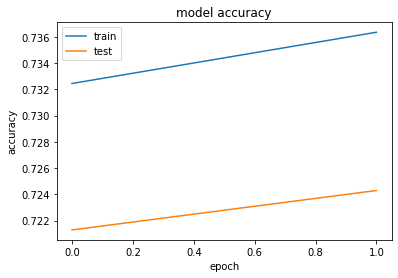

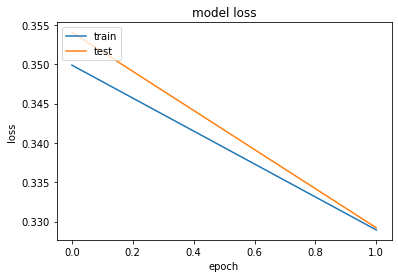

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [28]:
predictions = model.predict(test_data)

In [29]:
print(predictions)
pred_res = []
for a in predictions:
  max = np.amax(a)
  i = 0
  for b in a:
    if max == b:
      pred_res.append(i)
    i += 1


[[1.38365805e-01 9.23171416e-02 3.96182626e-01 3.73134404e-01]
 [9.25249696e-01 3.36336810e-03 6.08485080e-02 1.05384029e-02]
 [1.26983628e-01 1.08681224e-01 1.12537690e-01 6.51797473e-01]
 ...
 [9.82316554e-01 6.52100251e-04 1.49385724e-02 2.09276145e-03]
 [4.79702473e-01 4.29684073e-02 3.14047694e-01 1.63281471e-01]
 [5.69453657e-01 4.64598387e-02 1.26836479e-01 2.57250071e-01]]


In [30]:
print(pred_res)

[2, 0, 3, 2, 3, 0, 0, 3, 0, 0, 0, 3, 2, 0, 2, 0, 0, 3, 3, 3, 0, 0, 3, 3, 0, 3, 2, 0, 0, 3, 0, 3, 3, 0, 0, 3, 3, 0, 3, 0, 3, 0, 0, 2, 2, 0, 0, 0, 0, 3, 2, 2, 0, 2, 0, 2, 0, 3, 0, 0, 3, 0, 2, 3, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 3, 2, 3, 2, 0, 0, 0, 2, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 2, 0, 2, 0, 0, 3, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 3, 0, 0, 0, 3, 0, 2, 0, 3, 0, 2, 3, 0, 2, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 2, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 0, 0, 0, 2, 3, 0, 3, 0, 0, 0, 2, 0, 0, 2, 0, 3, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 3, 2, 2, 2, 0, 2, 0, 3, 0, 0, 0, 0, 2, 3, 3, 3, 2, 0, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 3, 3, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 3, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 3, 3, 2, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 3, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 3, 3, 0, 2, 0, 0, 0, 2, 0, 0, 3, 3, 0, 0, 3, 3, 0, 2, 3, 2, 0, 3, 3, 0, 3, 2, 3, 0, 2, 2, 0, 2, 3, 0, 0, 2, 3, 0, 0, 0, 3, 3, 0, 3, 2, 0, 2, 

In [31]:
real_res = []
for a in test_label:
  if a[0] == 1:
    real_res.append(0)
  elif a[1] == 1:
    real_res.append(1)
  elif a[2] == 1:
    real_res.append(2)
  else:
    real_res.append(3)


In [32]:
matched = 0
for a in range(0,len(real_res)):
  if real_res[a] == pred_res[a]:
    matched += 1
print(matched)
print(len(real_res))

6398
12706


In [21]:
accr_train = model.evaluate(train_data,train_label)
print('Accuracy Train: {}'.format(accr_train[1]*100))
accr_test = model.evaluate(test_data,test_label)
print('Accuracy Test: {}'.format(accr_test[1]*100))

781/781 [==============================] - 56s 72ms/step - loss: 0.3107 - accuracy: 0.7390
Accuracy Train: 73.89737963676453
398/398 [==============================] - 28s 72ms/step - loss: 0.3573 - accuracy: 0.7267
Accuracy Test: 72.67432808876038


In [ ]:
pred = model.predict_classes(X_test)
cf_matrix = confusion_matrix(y_test,pred)
sns.heatmap(cf_matrix, annot=True, fmt='g', xticklabels = ['Fake','Real'] , yticklabels = ['Fake','Real'])

In [ ]:
text_to_check = unseen_data_real
pred = get_pred_output(text_to_check)
print('Unseen real data prediction {} '.format(pred[0]))

text_to_check = unseen_data_fake
pred = get_pred_output(text_to_check)
print('Unseen fake data prediction {} '.format(pred[0]))

text_to_check = news_data_df.text[1000]
pred = get_pred_output(text_to_check)
print('Seen real data prediction {} '.format(pred[0]))

text_to_check = news_data_df.text[31000]
pred = get_pred_output(text_to_check)
print('Seen fake data prediction {} '.format(pred[0]))
